# 15-plots in plotly

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 1. Scatter plot

In [6]:
fig1 = px.scatter(df, x='sepal_length' , y='sepal_width', color="species")
fig1.show()
# save the plot
fig1.write_image("./output/fig1.png", scale=3)

# 2. Line plot

In [7]:
# sort the data
df_line = df.sort_values(by=['sepal_length'])

fig2 = px.line(df_line, x='sepal_length' , y='sepal_width', color="species")
fig2.show()

#save the plot
fig2.write_image("./output/fig2.png", scale=3)

# 3. Bar plot

In [8]:
# group values based on means
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [9]:
fig3 = px.bar(df_bar, x='species' , y='sepal_width')
fig3.show()
# save the plot
fig3.write_image("./output/fig3.png", scale=3)

<Axes: xlabel='species', ylabel='sepal_width'>

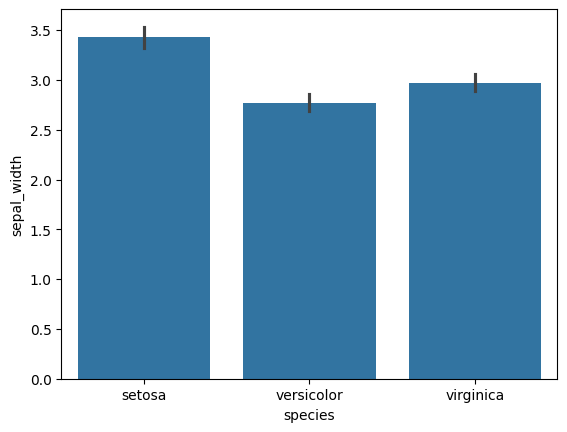

In [10]:
# seaborn does not need to make mean groups

sns.barplot(df, x="species", y= "sepal_width")

# 4. Boxplot

In [11]:
# Box plot

fig4 = px.box(df, x='species' , y='sepal_width', color = 'species')
fig4.show()

# save the plot
fig4.write_image("./output/fig4.png", scale=3)

# 5. Violin plot

In [12]:
# violon plot

fig5 = px.violin(df, x='species' , y='sepal_width', color = 'species', box=True)
fig5.show()
# save the plot
fig5.write_image("./output/fig5.png", scale=3)

# 6. Histogram

In [13]:
#6 histogram

fig6 = px.histogram(df, x='sepal_width',color = 'species')
fig6.show()

# save the plot
fig6.write_image("./output/fig6.png", scale=3)

# 7. Pie Chart

In [14]:
# first we have to check the dataset
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [15]:
# piechart
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig7 = px.pie(df_pie, values='count', names='species')
fig7.show()

# save the plot
fig7.write_image("./output/fig7.png", scale=3)

# 8. scatter 3D plot

In [16]:
# scatter 3d plot
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig8.show()

# save the plot in html
fig8.write_html("./output/fig8.html")

# 9. Area chart

In [17]:
# area chart
df_area = df.sort_values(by=['sepal_length'])

fig9 = px.area(df_area, x='sepal_width', y='sepal_length', color='species')
fig9.show()

# save the plot
fig9.write_image("./output/fig9.png", scale=3)

# 10. Bubble Chart

In [18]:
# bubble chart

fig10 = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig10.show()

# 11. Sunburst chart

In [19]:
# 11 sunburst chart
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig11.show()

# save this plot as html
fig11.write_html("./output/fig11.html")

#save this plot
fig11.write_image("./output/fig11.png", scale=3)

Let's try another sunburst plot

In [20]:
# create sunburst plot on titanic dataset
import plotly.express as px
import seaborn as sns
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Create a sunburst plot
fig = px.sunburst(titanic, 
                  path=['sex','class', 'who', 'alive', 'alone'], 
                  values='survived' , color='sex')
# Show the plot
fig.show()

c:\Users\butts\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\butts\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\butts\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and 

# 12. Parallel Coordinates plot

In [21]:
# Add a numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel Coordinates Plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()

# save the plot in html
fig12.write_html("./output/fig12.html")

#save the plot
fig12.write_image("./output/fig12.png", scale=3)

# 13. Desity contour plot

In [22]:
# Desity contour plot

fig13 = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()
# save this plot
fig13.write_image("./output/fig13.png", scale=3)

# 14. Ternary Plot

In [23]:
# Ternary Plot

fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()

# save this plot
fig14.write_image("./output/fig14.png", scale=3)

# 15. Polar chart (Radar Chart)

In [24]:
# Polar chart (Radar Chart)

df_radar = df.groupby(['species']).mean().reset_index()

fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()

# save the plot
fig15.write_image("./output/fig15.png", scale=3)